In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Load spacy English language model
NER = spacy.load("en_core_web_sm")

In [8]:
NER.max_length = 1161885

# Load Books

In [5]:
import os

# Get all book files in the data directory
all_books = [b for b in os.scandir('books') if '.txt' in b.name] 

In [6]:
all_books

[<DirEntry 'Harry Potter and the Deathly Hallows .txt'>,
 <DirEntry 'Harry Potter and the Prisoner of Azkaban .txt'>,
 <DirEntry 'Harry Potter and the Order of the Phoenix.txt'>,
 <DirEntry 'Harry Potter and The Half-Blood Prince.txt'>,
 <DirEntry "Harry Potter and the Sorcerer's Stone.txt">,
 <DirEntry 'Harry Potter and the Chamber of Secrets.txt'>,
 <DirEntry 'Harry Potter and the Goblet of Fire.txt'>]

In [13]:
book = all_books[6]
book_text = open(book).read()
book_doc = NER(book_text)

In [14]:
# Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter="true")

# Load Character names

In [157]:
# Read characters
character_df = pd.read_csv("harpot_character_list.csv")

In [158]:
# Remove brackets and text within brackets
import re
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [159]:
character_df

Unnamed: 0                                               sub  \
0             0                     Category:Deceased individuals   
1             1                     Category:Deceased individuals   
2             2                     Category:Deceased individuals   
3             3                     Category:Deceased individuals   
4             4                     Category:Deceased individuals   
5             5                     Category:Deceased individuals   
6             6                     Category:Deceased individuals   
7             7                     Category:Deceased individuals   
8             8                     Category:Deceased individuals   
9             9                     Category:Deceased individuals   
10           10                     Category:Deceased individuals   
11           11                     Category:Deceased individuals   
12           12                     Category:Deceased individuals   
13           13                     Category:Deceased individuals   
14           14                     Category:Deceased individuals   
15           15                     Category:Deceased individuals   
16           16                     Category:Deceased individuals   
17           17                     Category:Deceased individuals   
18           18                     Category:Deceased individuals   
19           19                     Category:Deceased individuals   
20           20                     Category:Deceased individuals   
21           21                     Category:Deceased individuals   
22           22                     Category:Deceased individuals   
23           23                     Category:Deceased individuals   
24           24                     Category:Deceased individuals   
25           25                     Category:Deceased individuals   
26           26                     Category:Deceased individuals   
27           27                     Category:Deceased individuals   
28           28                     Category:Deceased individuals   
29           29                     Category:Deceased individuals   
30           30                     Category:Deceased individuals   
31           31                     Category:Deceased individuals   
32           32                     Category:Deceased individuals   
33           33                     Category:Deceased individuals   
34           34                     Category:Deceased individuals   
35           35                     Category:Deceased individuals   
36           36                     Category:Deceased individuals   
37           37                     Category:Deceased individuals   
38           38                     Category:Deceased individuals   
39           39                     Category:Deceased individuals   
40           40                     Category:Deceased individuals   
41           41                     Category:Deceased individuals   
42           42                     Category:Deceased individuals   
43           43                     Category:Deceased individuals   
44           44                     Category:Deceased individuals   
45           45                     Category:Deceased individuals   
46           46                     Category:Deceased individuals   
47           47                     Category:Deceased individuals   
48           48                     Category:Deceased individuals   
49           49                     Category:Deceased individuals   
50           50                     Category:Deceased individuals   
51           51                     Category:Deceased individuals   
52           52                     Category:Deceased individuals   
53           53                     Category:Deceased individuals   
54           54                     Category:Deceased individuals   
55           55                     Category:Deceased individuals   
56           56                     Category:Deceased individuals   
57 

In [160]:
character_df[character_df['character'].str.contains('Ronald')]

Unnamed: 0                                        sub       character  \
186         186          Category:Impersonated individuals  Ronald Weasley   
204         204  Category:Individuals with shortened names  Ronald Weasley   

    character_firstname  
186              Ronald  
204              Ronald

In [161]:
# Replace Ronald Weasley as Ron Weasley
character_df.at[186,'character'] = 'Ron Weasley'
character_df.at[186,'character_firstname'] = 'Ron'

In [118]:
pd.set_option('display.max_rows', None)

# Cleaning dataframe

In [162]:
# remove row containing word "Category" and "Unidentified"
character_df = character_df[~character_df['character'].str.contains('Category')]

In [163]:
character_df = character_df[~character_df['character'].str.contains('Unidentified')]

In [164]:
character_df = character_df[~character_df['sub'].str.contains('Unidentified')]

In [165]:
character_df = character_df[~character_df['character'].str.contains('Muggle')]

In [166]:
# export clean character
character_df.to_csv('clean_harpot_character_list.csv')

# Get name entity list per sentence

In [82]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [123]:
sent_entity_df

sentence  \
0      (Harry, Potter, and, the, Goblet, of, Fire, \n...   
1      (The, villagers, of, Little, Hangleron, still,...   
2      (It, stood, on, a, hill, overlooking, the, vil...   
3      (Once, a, fine, -, looking, manor, ,, and, eas...   
4      (The, Little, Hagletons, all, agreed, that, th...   
5      (Half, a, century, ago, ,, something, strange,...   
6      (The, story, had, been, picked, over, so, many...   
7      (Every, version, of, the, tale, ,, however, ,,...   
8      (The, maid, had, run, screaming, down, the, hi...   
9      (", Lying, there, with, their, eyes, wide, ope...   
10                                    (Cold, as, ice, !)   
11        (Still, in, their, dinner, things, !, ", \n　　)   
12     (The, police, were, summoned, ,, and, the, who...   
13     (Nobody, wasted, their, breath, pretending, to...   
14     (Elderly, Mr., and, Mrs., \n　　, Riddle, had, b...   
15     (All, the, villagers, cared, about, was, the, ...   
16     (The, Hanged, Man, ,, the, village, pub, ,, di...   
17     (They, were, rewarded, for, leaving, their, fi...   
18           (", Frank, !, ", cried, several, people, .)   
19     (", Never, !, ", \n　　, Frank, Bryce, was, the,...   
20     (He, lived, alone, in, a, run, -, down, cottag...   
21     (Frank, had, come, back, from, the, war, with,...   
22     (There, was, a, rush, to, buy, the, cook, drin...   
23     (", Always, thought, he, was, odd, ,, ", she, ...   
24                           (", Unfriendly, ,, like, .)   
25     (I, 'm, sure, if, I, 've, offered, him, a, cup...   
26          (Never, wanted, to, mix, ,, he, did, n't, .)   
27     (", \n　　, ", Ah, ,, now, ,, ", said, a, woman,...   
28                      (He, likes, the, quiet, life, .)   
29     (That, 's, no, reason, to, --, ", \n　　, ", Who...   
30     (", There, 's, been, a, spare, key, hanging, i...   
31           (Nobody, forced, the, door, last, night, !)   
32                              (No, broken, windows, !)   
33     (All, Frank, had, to, do, was, creep, up, to, ...   
34     (", I, always, thought, that, he, had, a, nast...   
35     (", War, turned, him, funny, ,, if, you, ask, ...   
36     (", Told, you, I, would, n't, like, to, get, o...   
37     (", Horrible, temper, ,, ", said, Dot, ,, nodd...   
38     (", I, remember, ,, when, he, was, a, kid, ......   
39     (But, over, in, the, neighboring, town, of, Gr...   
40     (Nobody, else, in, the, village, had, seen, an...   
41     (Then, ,, just, when, things, were, looking, v...   
42     (The, police, had, never, read, an, odder, rep...   
43     (A, team, of, doctors, had, examined, the, bod...   
44     (In, fact, (, the, report, continued, ,, in, a...   
45     (The, doctors, did, note, (, as, though, deter...   
46     (As, there, was, no, proof, that, the, Riddles...   
47     (The, Riddles, were, buried, in, the, Little, ...   
48     (To, everyone, 's, surprise, ,, and, amid, a, ...   
49     (", 'S, far, as, I, 'm, concerned, ,, he, kill...   
50     (", And, if, he, had, any, decency, ,, he, 'd,...   
51                                             (", \n　　)   
52                      (But, Frank, did, not, leave, .)   
53     (He, stayed, to, tend, the, garden, for, the, ...   
54     (Perhaps, it, was, partly, because, of, Frank,...   
55     (The, wealthy, man, who, owned, the, Riddle, H...   
56     (The, wealthy, owner, continued, to, pay, Fran...   
57     (Frank, was, nearing, his, seventy, -, seventh...   
58     (Weeds, were, not, the, only, things, Frank, h...   
59     (Boys, from, the, village, made, a, habit, of,...   
60     (They, rode, their, bicycles, over, the, lawns...   
61     (Once, or, twice, ,, they, broke, into, the, o...   
62     (They, knew, that, old, Frank, 's, devotion, t...   
63     (Frank, ,, for, his, part, ,, believed, the, b...   
64     (So, when, Frank, awoke, one, night, in, Augus...   
65     (It, was, Frank, 's, bad, leg, that, woke, him...   
66     (He, got, up, and, li

In [167]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence  \
0      (Harry, Potter, and, the, Goblet, of, Fire, \n...   
14     (Elderly, Mr., and, Mrs., \n　　, Riddle, had, b...   
120    (", It, could, be, done, without, Harry, Potte...   
126    (", Laying, hands, on, Harry, Potter, would, b...   
153    (Come, ,, Wormtail, ,, one, more, death, and, ...   
...                                                  ...   
13817                     (Keep, in, touch, ,, Harry, .)   
13819  (Harry, ,, ", said, Ron, ,, clapping, him, on,...   
13820  (", ', Bye, ,, Harry, !, ", said, Hermione, ,,...   
13821  (", Harry, -, thanks, ,, ", George, muttered, ...   
13822  (Harry, winked, at, them, ,, turned, to, Uncle...   

                                              entities character_entities  
0      [Harry Potter, J.K., CHAPTER, THE RIDDLE HOUSE]            [Harry]  
14                                 [Mrs., Riddle, Tom]              [Tom]  
120                                     [Harry Potter]            [Harry]  
126                                     [Harry Potter]            [Harry]  
153                [Come, Wormtail, one, Harry Potter]            [Harry]  
...                                                ...                ...  
13817                                          [Harry]            [Harry]  
13819                                     [Harry, Ron]       [Harry, Ron]  
13820                          ['Bye, Harry, Hermione]  [Harry, Hermione]  
13821                   [Harry - thanks, George, Fred]           [George]  
13822                            [Harry, Uncle Vernon]            [Harry]  

[3756 rows x 3 columns]

In [168]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [169]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence  \
0    (Harry, Potter, and, the, Goblet, of, Fire, \n...   
14   (Elderly, Mr., and, Mrs., \n　　, Riddle, had, b...   
120  (", It, could, be, done, without, Harry, Potte...   
126  (", Laying, hands, on, Harry, Potter, would, b...   
153  (Come, ,, Wormtail, ,, one, more, death, and, ...   
183  (And, he, was, planning, more, murders, --, th...   
187  (", One, more, murder, ..., my, faithful, serv...   
249  (Two, hundred, miles, away, ,, the, boy, calle...   
250  (CHAPTER, TWO, -, THE, SCAR, \n　　, Harry, lay,...   
255  (Harry, ran, his, fingers, over, the, scar, ag...   

                                            entities character_entities  
0    [Harry Potter, J.K., CHAPTER, THE RIDDLE HOUSE]     [Harry Potter]  
14                               [Mrs., Riddle, Tom]              [Tom]  
120                                   [Harry Potter]     [Harry Potter]  
126                                   [Harry Potter]     [Harry Potter]  
153              [Come, Wormtail, one, Harry Potter]     [Harry Potter]  
183                                   [Harry Potter]     [Harry Potter]  
187                    [One, Harry Potter, Wormtail]     [Harry Potter]  
249                [Two hundred miles, Harry Potter]     [Harry Potter]  
250                       [CHAPTER TWO, SCAR, Harry]            [Harry]  
255                                          [Harry]            [Harry]

In [170]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

/Users/teguhbudianto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [171]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence  \
0      (Harry, Potter, and, the, Goblet, of, Fire, \n...   
14     (Elderly, Mr., and, Mrs., \n　　, Riddle, had, b...   
120    (", It, could, be, done, without, Harry, Potte...   
126    (", Laying, hands, on, Harry, Potter, would, b...   
153    (Come, ,, Wormtail, ,, one, more, death, and, ...   
...                                                  ...   
13819  (Harry, ,, ", said, Ron, ,, clapping, him, on,...   
13820  (", ', Bye, ,, Harry, !, ", said, Hermione, ,,...   
13821  (", Harry, -, thanks, ,, ", George, muttered, ...   
13822  (Harry, winked, at, them, ,, turned, to, Uncle...   
13824  (As, Hagrid, had, said, ,, what, would, come, ...   

                                              entities character_entities  
0      [Harry Potter, J.K., CHAPTER, THE RIDDLE HOUSE]            [Harry]  
14                                 [Mrs., Riddle, Tom]              [Tom]  
120                                     [Harry Potter]            [Harry]  
126                                     [Harry Potter]            [Harry]  
153                [Come, Wormtail, one, Harry Potter]            [Harry]  
...                                                ...                ...  
13819                                     [Harry, Ron]       [Harry, Ron]  
13820                          ['Bye, Harry, Hermione]  [Harry, Hermione]  
13821                   [Harry - thanks, George, Fred]           [George]  
13822                            [Harry, Uncle Vernon]            [Harry]  
13824                                         [Hagrid]           [Hagrid]  

[4461 rows x 3 columns]

# Create relationship

In [172]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [173]:
relationship_df = pd.DataFrame(relationships)

In [174]:
relationship_df

source  target
0       Peter   Harry
1       Peter   Harry
2       Peter   Harry
3       Peter   Harry
4       Peter   Harry
...       ...     ...
14919  George   Harry
14920   Harry  Hagrid
14921  George   Harry
14922   Harry  Hagrid
14923   Harry  Hagrid

[14924 rows x 2 columns]

In [175]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

source target
0       Harry  Peter
1       Harry  Peter
2       Harry  Peter
3       Harry  Peter
4       Harry  Peter
...       ...    ...
14919  George  Harry
14920  Hagrid  Harry
14921  George  Harry
14922  Hagrid  Harry
14923  Hagrid  Harry

[14924 rows x 2 columns]

In [176]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [177]:
relationship_df

source     target  value
0          Harry      Peter      9
1          Harry     Hedwig    205
2          Harry   Hermione    918
3          Harry        Ron   3438
4          Harry     Sirius    471
..           ...        ...    ...
196       Hagrid      Poppy      3
197      Severus     Sirius      5
198        Harry      Remus      1
199        Fleur  Hogsmeade      2
200  Crookshanks     Hedwig      6

[201 rows x 3 columns]

In [142]:
pd.set_option('display.max_rows', None)

# Graph analysis and visualization

In [178]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

### graph vis by NetworkX

/Users/teguhbudianto/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


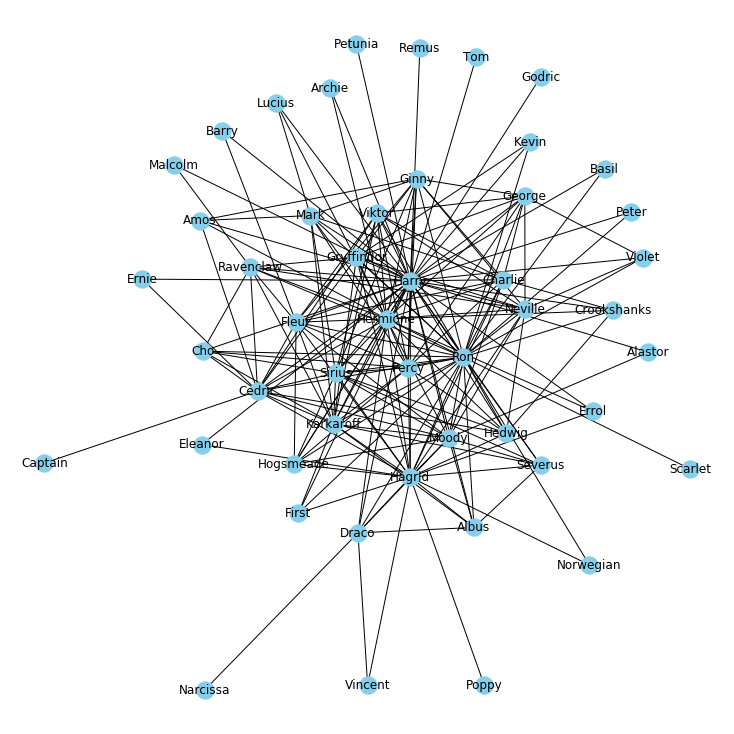

In [179]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### graph vis by Pyvis

In [194]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')
net.repulsion()
net.from_nx(G)
net.show("harpot.html")

harpot.html


# The most important character in Harpot

In [181]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Harry': 0.875,
 'Peter': 0.041666666666666664,
 'Hedwig': 0.1875,
 'Hermione': 0.5208333333333333,
 'Ron': 0.6458333333333333,
 'Sirius': 0.3125,
 'Hagrid': 0.47916666666666663,
 'Errol': 0.0625,
 'Petunia': 0.020833333333333332,
 'Percy': 0.3125,
 'George': 0.20833333333333331,
 'Charlie': 0.25,
 'Ginny': 0.25,
 'Crookshanks': 0.10416666666666666,
 'Viktor': 0.22916666666666666,
 'Gryffindor': 0.22916666666666666,
 'Amos': 0.10416666666666666,
 'Cedric': 0.3333333333333333,
 'Captain': 0.020833333333333332,
 'Basil': 0.041666666666666664,
 'First': 0.08333333333333333,
 'Kevin': 0.0625,
 'Archie': 0.041666666666666664,
 'Cho': 0.14583333333333331,
 'Ravenclaw': 0.20833333333333331,
 'Barry': 0.041666666666666664,
 'Hogsmeade': 0.16666666666666666,
 'Lucius': 0.0625,
 'Draco': 0.16666666666666666,
 'Narcissa': 0.020833333333333332,
 'Mark': 0.20833333333333331,
 'Albus': 0.14583333333333331,
 'Moody': 0.3125,
 'Neville': 0.25,
 'Malcolm': 0.041666666666666664,
 'Eleanor': 0.041666666

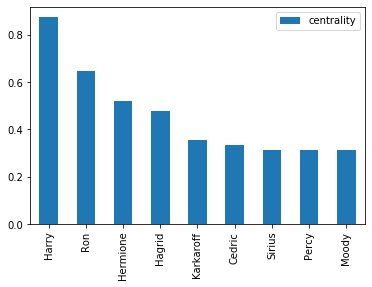

In [182]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

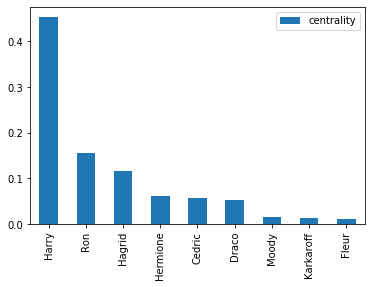

In [183]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

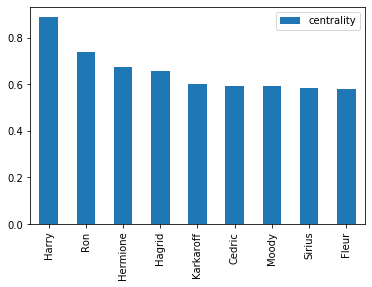

In [184]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [185]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

### Community detection

In [108]:
!pip install python-louvain

     |████████████████████████████████| 204kB 4.6MB/s eta 0:00:01
  Created wheel for python-louvain: filename=python_louvain-0.16-cp37-none-any.whl size=9395 sha256=d8f55e948fed4abe0c7faa997c55f0bce0d40d5a6a8cddd0a9a03e27aad66cdc
  Stored in directory: /Users/teguhbudianto/Library/Caches/pip/wheels/73/68/16/01a6fa0a2f8a718cda81c3b8108d5afbc9feb1030d053e5532
Successfully built python-louvain


In [187]:
import community.community_louvain as community_louvain

In [188]:
communities = community_louvain.best_partition(G)

In [189]:
communities

{'Harry': 2,
 'Peter': 1,
 'Hedwig': 3,
 'Hermione': 3,
 'Ron': 1,
 'Sirius': 3,
 'Hagrid': 0,
 'Errol': 0,
 'Petunia': 2,
 'Percy': 3,
 'George': 1,
 'Charlie': 3,
 'Ginny': 3,
 'Crookshanks': 3,
 'Viktor': 3,
 'Gryffindor': 1,
 'Amos': 3,
 'Cedric': 2,
 'Captain': 2,
 'Basil': 1,
 'First': 0,
 'Kevin': 1,
 'Archie': 2,
 'Cho': 2,
 'Ravenclaw': 2,
 'Barry': 0,
 'Hogsmeade': 0,
 'Lucius': 3,
 'Draco': 0,
 'Narcissa': 0,
 'Mark': 3,
 'Albus': 0,
 'Moody': 0,
 'Neville': 1,
 'Malcolm': 2,
 'Eleanor': 0,
 'Norwegian': 0,
 'Ernie': 2,
 'Karkaroff': 0,
 'Fleur': 0,
 'Severus': 0,
 'Violet': 1,
 'Vincent': 0,
 'Scarlet': 1,
 'Godric': 2,
 'Tom': 2,
 'Alastor': 0,
 'Poppy': 0,
 'Remus': 2}

In [190]:
nx.set_node_attributes(G, communities, 'group')

In [192]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.repulsion()
com_net.from_nx(G)
com_net.show("harpot_communities.html")

harpot_communities.html
